## Sales Prediction using Prophet

In [24]:
#import all the required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import prophet
import warnings
warnings.filterwarnings('ignore')

In [67]:
df=pd.read_csv('C:/Users/manda/Downloads/gpuTrainData.csv')#Clean Data from the main notebook(2016,2017)

In [68]:
df.drop(['Unnamed: 0','family','store_nbr_obj','dateyear','datemonth','dateday','dateweekday','city','type'],axis=1,inplace=True)

In [83]:
df.date=pd.to_datetime(df.date)

In [84]:
fdf=pd.DataFrame()

In [100]:
fdf['y']=df.sales#Only 2 columns required

In [86]:
fdf['ds']=df.date

In [87]:
fdf=fdf.drop(fdf[fdf.y>2000].index)#outliers removed

In [88]:
fdf=fdf.sample(frac=0.1)#Using 10% of data

In [89]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98636 entries, 13304 to 103334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       98636 non-null  float64       
 1   ds      98636 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB


In [74]:
from prophet import Prophet

In [90]:
m=Prophet()

In [91]:
model=m.fit(fdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [96]:
future=m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,168.244434,-290.369336,620.945085,168.244434,168.244434,1.546544,1.546544,1.546544,1.546544,1.546544,1.546544,0.0,0.0,0.0,169.790978
1,2016-01-02,168.483683,-315.356205,616.814539,168.483683,168.483683,11.836951,11.836951,11.836951,11.836951,11.836951,11.836951,0.0,0.0,0.0,180.320634
2,2016-01-03,168.722932,-250.445101,611.908714,168.722932,168.722932,20.457058,20.457058,20.457058,20.457058,20.457058,20.457058,0.0,0.0,0.0,189.179990
3,2016-01-04,168.962180,-305.473439,642.102900,168.962180,168.962180,-2.304005,-2.304005,-2.304005,-2.304005,-2.304005,-2.304005,0.0,0.0,0.0,166.658176
4,2016-01-05,169.201429,-269.172365,595.932567,169.201429,169.201429,-12.511229,-12.511229,-12.511229,-12.511229,-12.511229,-12.511229,0.0,0.0,0.0,156.690200


In [97]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
687,2017-11-19,181.953827,-295.337324,632.525168,177.477016,186.401390,20.457058,20.457058,20.457058,20.457058,20.457058,20.457058,0.0,0.0,0.0,202.410885
688,2017-11-20,181.940831,-276.326473,642.590567,177.415498,186.480548,-2.304005,-2.304005,-2.304005,-2.304005,-2.304005,-2.304005,0.0,0.0,0.0,179.636826
689,2017-11-21,181.927834,-295.137547,578.379030,177.316230,186.521189,-12.511229,-12.511229,-12.511229,-12.511229,-12.511229,-12.511229,0.0,0.0,0.0,169.416606
690,2017-11-22,181.914838,-248.446696,585.382908,177.195364,186.582132,-9.869380,-9.869380,-9.869380,-9.869380,-9.869380,-9.869380,0.0,0.0,0.0,172.045458
691,2017-11-23,181.901842,-302.346559,612.394267,177.096128,186.680764,-9.155939,-9.155939,-9.155939,-9.155939,-9.155939,-9.155939,0.0,0.0,0.0,172.745903


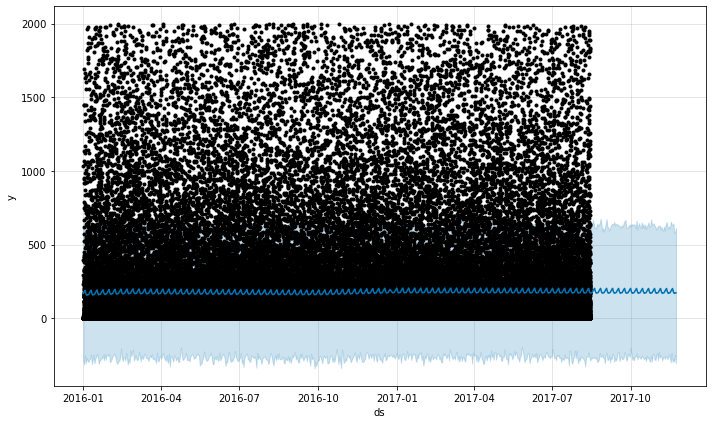

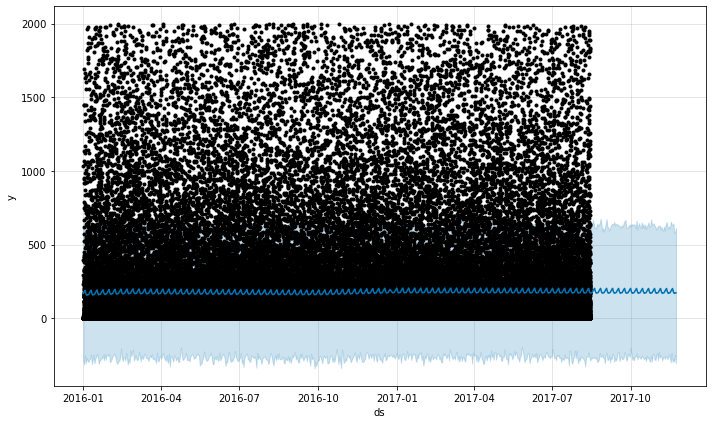

In [98]:
m.plot(forecast)#Not great at forcasting this data

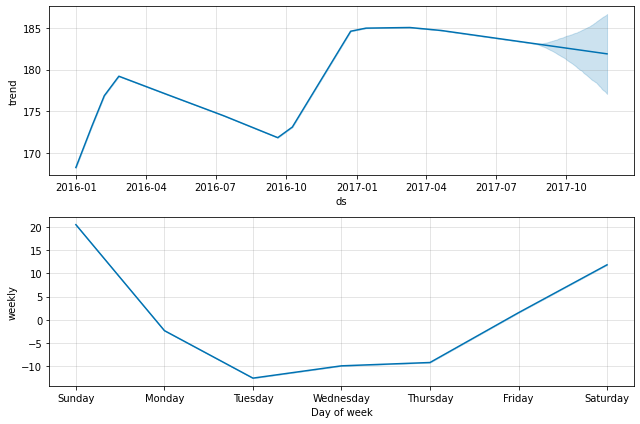

In [102]:
fig=m.plot_components(forecast)#It gives nice insights into trends